Adjacency Matrix: 
[[0.         0.33333333 0.33333333 0.33333333 0.         0.
  0.        ]
 [0.         0.         0.         0.5        0.5        0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]
 [0.         0.         0.33333333 0.         0.         0.33333333
  0.33333333]
 [0.         0.         0.         0.5        0.         0.
  0.5       ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         1.
  0.        ]]
Stochastic Matrix: 
[0.         0.33333333 0.33333333 0.33333333 0.         0.
 0.        ]
[0.  0.  0.  0.5 0.5 0.  0. ]
[0. 0. 0. 0. 0. 1. 0.]
[0.         0.         0.33333333 0.         0.         0.33333333
 0.33333333]
[0.  0.  0.  0.5 0.  0.  0.5]
[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[0. 0. 0. 0. 0. 1. 0.]
Pagerank after iteration: it
[[0.15       0.15       0.15       0.15       0.15       0.16734694

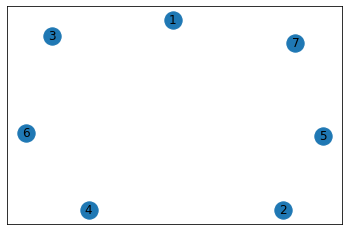

In [3]:
import math
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt 

G = nx.DiGraph(Directed=True)
for i in range(1, 8):
    G.add_node(i)
nx.draw_networkx(G, with_labels = True)
G.add_edges_from([(1, 2), (1, 3), (1,4), (2, 4), (2, 5), (3, 6), (4, 3), (4, 6), (4, 7), (5, 4), (5, 7), (7, 6)])
A = nx.to_numpy_matrix(G)
Adj = np.asarray(A)
for i in Adj:
    for j in i:
        j = math.floor(j)
for i in range(0,7):
    s=0
    for j in range(0,7):
        s+=Adj[i][j]
    for j in range(0,7):
        if Adj[i][j]!=0:
            Adj[i][j]=Adj[i][j]/s
print("Adjacency Matrix: ")
print(Adj)

c=[]
for i in range(0,7):
    n=0
    for j in range(0,7):
        if Adj[i][j]==0.0:
            n+=1
    if n==7:
        c.append(i)
            
for i in c:
    for j in range(0,7):
        Adj[i][j]=float(1/7)
    
print('Stochastic Matrix: ')
for i in range(0,7):
    print(Adj[i])
At=np.transpose(Adj)
P=[1/7, 1/7, 1/7, 1/7, 1/7, 1/7, 1/7]
d=0.85
e=0.025
c=0
it=0
while c==0:
    it+=1
    arr=[]
    for i in P:
        arr.append(i)
    P=(1-d)+d*At*P
    print("Pagerank after iteration: ",it)
    print(P)
    arr2 = []
    for i in P:
        arr2.append(i)
    for i in range(len(P)):
        if abs((arr[i]-arr2[i]).any())<e:
            c=1            
rank = nx.pagerank_scipy(G, alpha=0.85,tol=0.025)
print(rank)

print('Number of Iterations: ', it)